In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv('/content/MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [68]:
df['admission'] = df['admission'].fillna('Waitlist')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Waitlist
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Waitlist
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Waitlist


In [69]:
df['admission'].value_counts()

,count
admission,
Waitlist,5294
Admit,900


In [70]:
df.duplicated().sum()

0

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       6194 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [72]:
df.dropna(inplace=True)

In [73]:
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


In [74]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Waitlist
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Waitlist
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Waitlist
5,6,Male,False,3.18,Business,White,610.0,6.0,Consulting,Waitlist


In [75]:
df = df.iloc[:, 1:]
df.sample(10)

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
927,Female,False,3.42,STEM,Hispanic,780.0,6.0,Consulting,Admit
1527,Male,False,3.25,Humanities,Hispanic,650.0,5.0,Consulting,Waitlist
3040,Male,False,3.16,STEM,Asian,640.0,4.0,PE/VC,Waitlist
4170,Male,False,3.34,Humanities,Asian,670.0,5.0,Health Care,Waitlist
20,Male,False,3.46,Business,White,760.0,5.0,Investment Banking,Admit
1779,Male,False,3.23,Humanities,Asian,650.0,3.0,Health Care,Waitlist
5937,Male,False,3.36,Humanities,Asian,680.0,5.0,PE/VC,Waitlist
503,Female,False,3.37,Humanities,Black,640.0,4.0,Technology,Waitlist
120,Male,False,3.22,Business,Black,610.0,5.0,Technology,Waitlist
175,Male,False,2.97,STEM,Asian,610.0,6.0,Technology,Waitlist


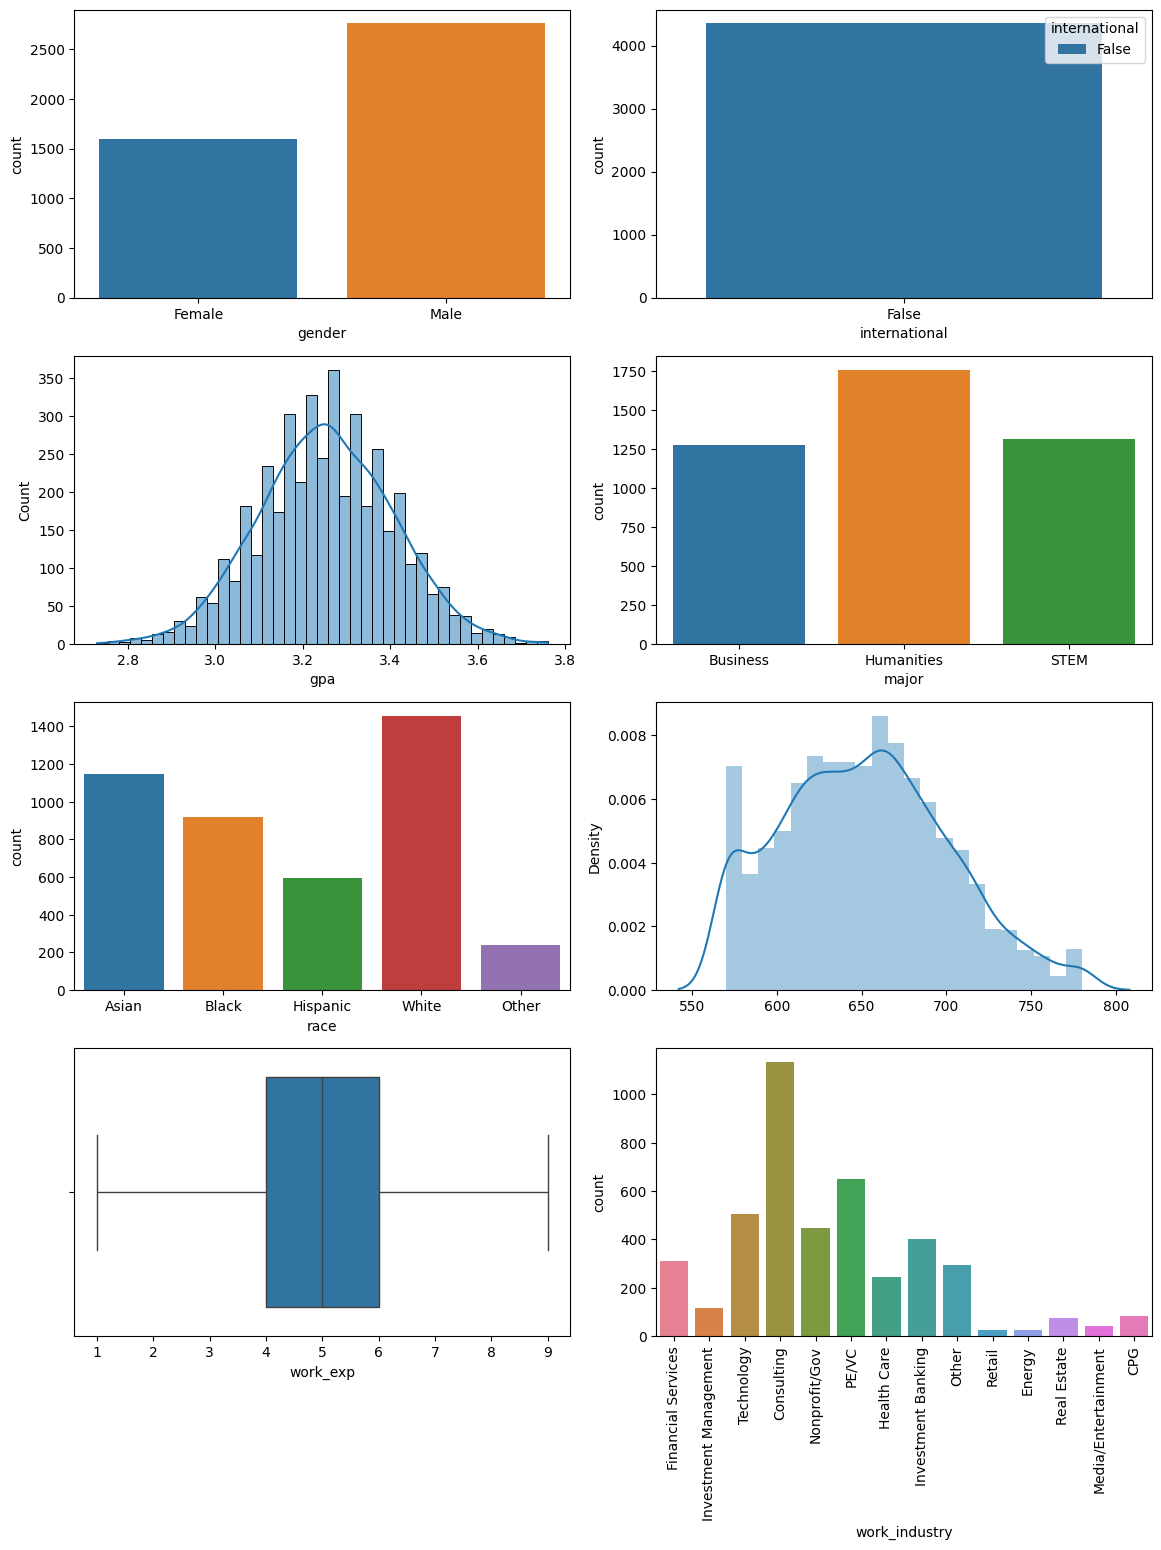

In [76]:
fig, axes = plt.subplots(4, 2, figsize=(12, 14))

sns.countplot(x = 'gender', data = df, ax = axes[0, 0], hue = 'gender')
sns.countplot(x = 'international', data = df, ax = axes[0, 1], hue = 'international')
sns.histplot(x = 'gpa', data = df, ax = axes[1, 0], kde = True)
sns.countplot(x = 'major', data = df, ax = axes[1, 1], hue = 'major')
sns.countplot(x = 'race', data = df, ax = axes[2, 0], hue = 'race')
sns.distplot(x = df['gmat'], ax = axes[2, 1])
sns.boxplot(x = 'work_exp', data = df, ax = axes[3, 0])
sns.countplot(x = 'work_industry', data = df, ax = axes[3, 1], hue = 'work_industry')

plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()



In [77]:
for col in df.select_dtypes(include=['object', 'bool']).columns:
  print(df[col].value_counts())
  print('\n')

gender
Male      2760
Female    1592
Name: count, dtype: int64


international
False    4352
Name: count, dtype: int64


major
Humanities    1760
STEM          1317
Business      1275
Name: count, dtype: int64


race
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


work_industry
Consulting               1134
PE/VC                     649
Technology                504
Nonprofit/Gov             448
Investment Banking        404
Financial Services        311
Other                     293
Health Care               244
Investment Management     118
CPG                        82
Real Estate                74
Media/Entertainment        41
Retail                     25
Energy                     25
Name: count, dtype: int64


admission
Waitlist    3730
Admit        622
Name: count, dtype: int64




In [78]:
df.drop(columns = 'international', inplace = True)

In [79]:
df.head()

,gender,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,Waitlist
3,Male,3.47,STEM,Black,690.0,6.0,Technology,Waitlist
4,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,Waitlist
5,Male,3.18,Business,White,610.0,6.0,Consulting,Waitlist


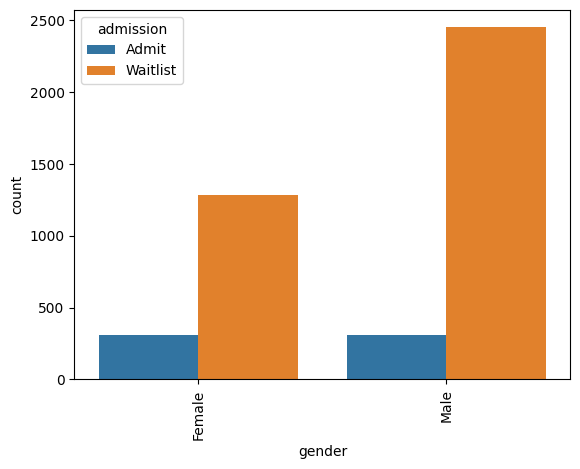

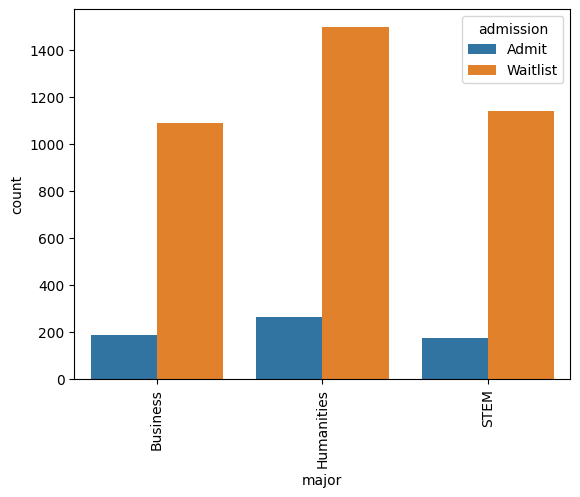

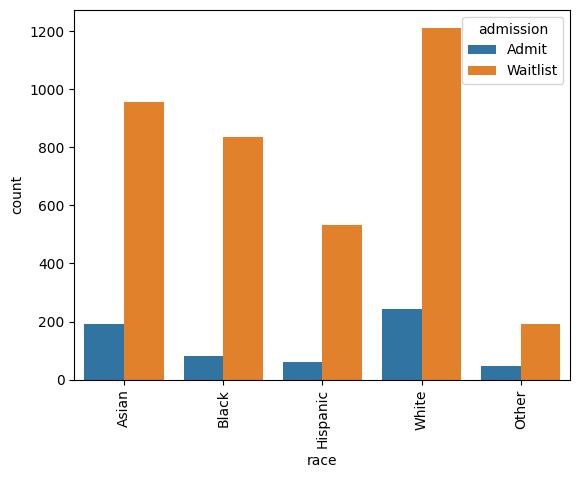

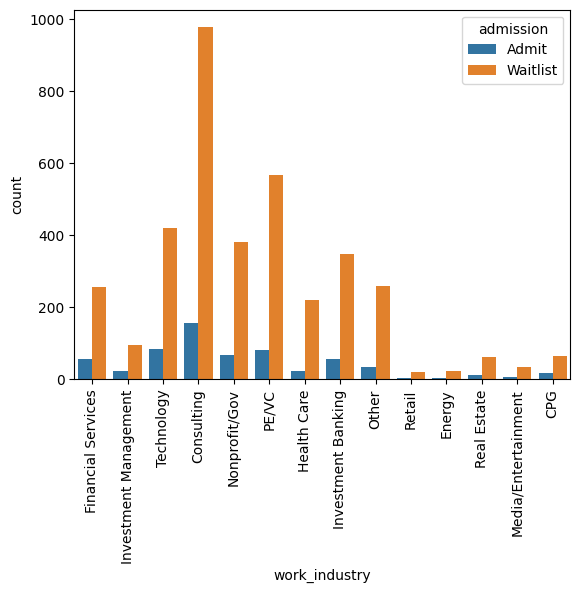

In [84]:
for col in df.select_dtypes(include = 'object').columns:
  if col != 'admission':
    sns.countplot(x = col, data = df, hue = 'admission')
    plt.xticks(rotation = 90)
    plt.show()


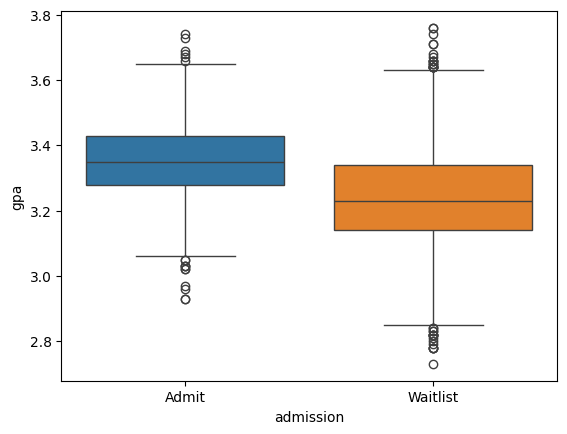

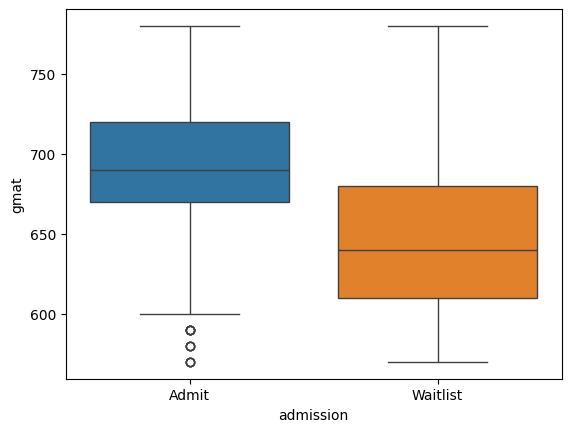

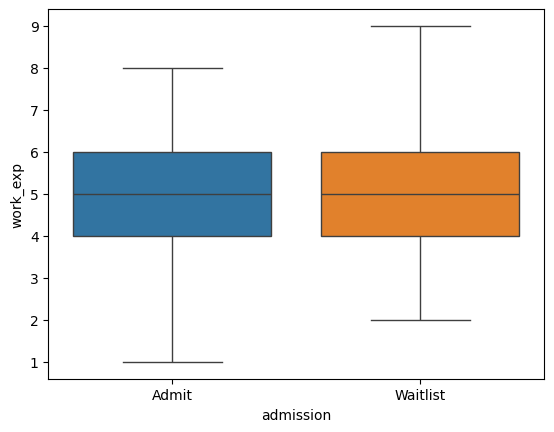

In [91]:
for col in df.select_dtypes(include = ['int', 'float']).columns:
  sns.boxplot(x = 'admission', y = col, data = df, hue = 'admission')
  plt.show()


In [92]:
cat_cols = df.select_dtypes(include = 'object').drop(columns = 'admission').columns
cat_cols

Index(['gender', 'major', 'race', 'work_industry'], dtype='object')

In [93]:
df = pd.get_dummies(df, columns = cat_cols, dtype = int, drop_first = True)
df.head()

,gpa,gmat,work_exp,admission,gender_Male,major_Humanities,major_STEM,race_Black,race_Hispanic,race_Other,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,3.30,620.0,3.0,Admit,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.28,680.0,5.0,Waitlist,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3.47,690.0,6.0,Waitlist,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.35,590.0,5.0,Waitlist,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,3.18,610.0,6.0,Waitlist,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['admission'] = encoder.fit_transform(df['admission'])
df.head()

,gpa,gmat,work_exp,admission,gender_Male,major_Humanities,major_STEM,race_Black,race_Hispanic,race_Other,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,3.30,620.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.28,680.0,5.0,1,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3.47,690.0,6.0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.35,590.0,5.0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,3.18,610.0,6.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
X = df.drop(columns = 'admission')
y = df['admission']

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [97]:
num_columns = ['gpa', 'gmat', 'work_exp']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [98]:
X_train.head()

,gpa,gmat,work_exp,gender_Male,major_Humanities,major_STEM,race_Black,race_Hispanic,race_Other,race_White,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
3516,-1.652050,-0.018986,0.932757,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4559,-0.079383,0.789478,-1.003395,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5988,-0.734661,-1.231683,-1.003395,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1324,-0.538077,-1.635915,-0.035319,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
512,-0.800188,-0.625335,0.932757,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [99]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

lg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(random_state = 42)
ab_model = AdaBoostClassifier(random_state = 42)
gb_model = GradientBoostingClassifier(random_state = 42)

def build_evaluate_models(x_train, x_test, y_train, y_test):
  models = [lg_model, dt_model, rf_model, ab_model, gb_model]
  model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
  for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(classification_rep)
    print("\n")

build_evaluate_models(X_train, X_test, y_train, y_test)

Logistic Regression Metrics:
Accuracy: 0.7761194029850746
Precision: 0.9299065420560748
Recall: 0.7991967871485943
F1 Score: 0.8596112311015118
Confusion Matrix:
[[ 79  45]
 [150 597]]
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.64      0.45       124
           1       0.93      0.80      0.86       747

    accuracy                           0.78       871
   macro avg       0.64      0.72      0.65       871
weighted avg       0.85      0.78      0.80       871



Decision Tree Metrics:
Accuracy: 0.8002296211251435
Precision: 0.9098712446351931
Recall: 0.8514056224899599
F1 Score: 0.8796680497925311
Confusion Matrix:
[[ 61  63]
 [111 636]]
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.49      0.41       124
           1       0.91      0.85      0.88       747

    accuracy                           0.80       871
   macro avg       0.63      0.67      0.65

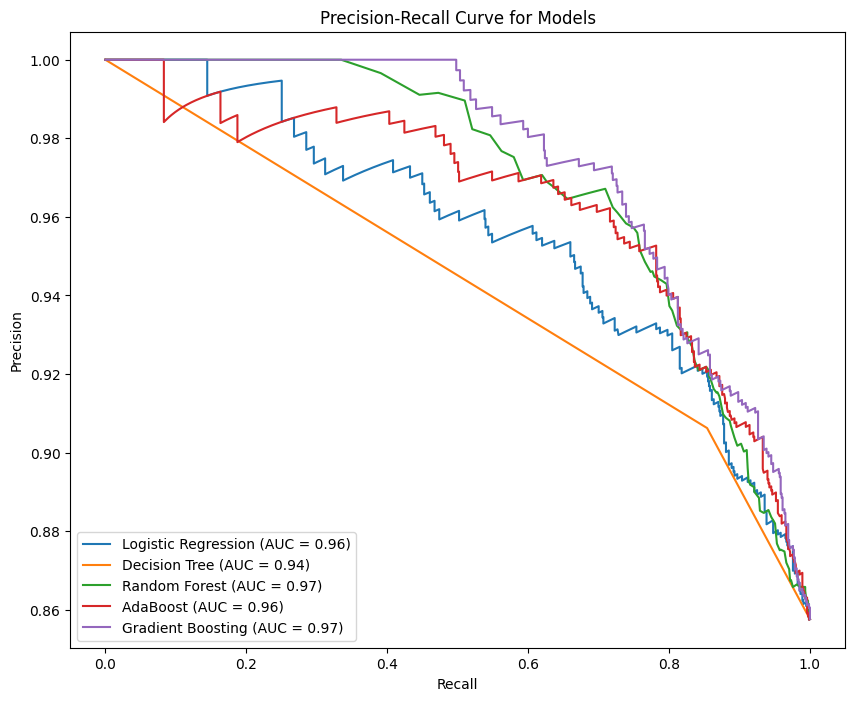

In [101]:
from sklearn.metrics import precision_recall_curve, auc


def build_models_pr_curve(x_train, x_test, y_train, y_test):
  models = [lg_model, dt_model, rf_model, ab_model, gb_model]
  model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
  plt.figure(figsize=(10, 8))
  for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label = f'{name} (AUC = {pr_auc:.2f})')


  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title("Precision-Recall Curve for Models")
  plt.legend(loc = 'lower left')
  plt.show()

build_models_pr_curve(X_train, X_test, y_train, y_test)
